In [1]:
%matplotlib inline

import pandas as pd
from datetime import datetime

going_df = pd.read_pickle('data/pickles/going_df.p')

returning_df = pd.read_pickle('data/pickles/returning_df.p')

# transform seconds to minutes
going_df = going_df / 60
returning_df = returning_df / 60
# change column names for clarity
going_df = going_df.rename(columns={'optimistic':'best_case', 'best_guess':'average', 'pessimistic':'worst_case'})
returning_df = returning_df.rename(columns={'optimistic':'best_case', 'best_guess':'average', 'pessimistic':'worst_case'})

returning_df.head()

,best_case,average,worst_case
2017-10-02 14:00:00,25.033333,29.516667,42.683333
2017-10-02 14:10:00,26.116667,31.650000,45.083333
2017-10-02 14:20:00,26.683333,33.633333,49.450000
2017-10-02 14:30:00,27.483333,36.550000,54.383333
2017-10-02 14:40:00,29.533333,38.416667,57.016667


Create df just for Monday data

In [2]:
monday_going_df = going_df[going_df.index < datetime(2017, 10, 3)]
monday_returning_df = returning_df[returning_df.index < datetime(2017, 10, 3)]

Some sample plots

# Going

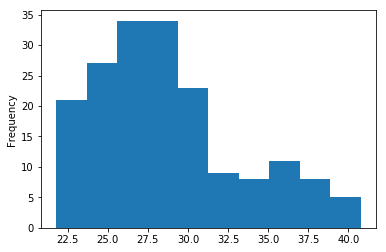

In [3]:
going_df['average'].plot.hist()

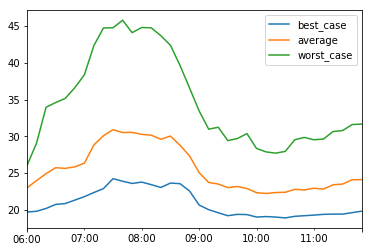

In [4]:
monday_going_df.plot(kind='line')

# Returning

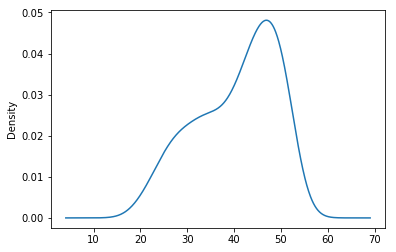

In [5]:
# kernel density estimatation
returning_df['average'].plot(kind='kde')

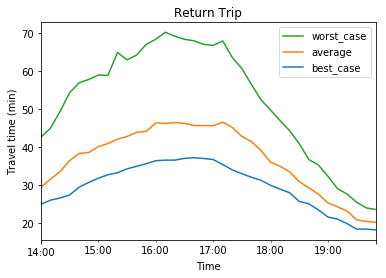

In [9]:
ax = monday_returning_df.plot(kind='line', title='Return Trip', legend='reverse')
ax.set_xlabel('Time')
ax.set_ylabel('Travel time (min)')

Travel times are worse in the afternoon, above an average of 40min from 3pm. Times start to become managable (30min) again after 6pm.